In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from ISLP import load_data, confusion_table
from ISLP.svm import plot as plot_svm

c:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
roc_curve = RocCurveDisplay.from_estimator

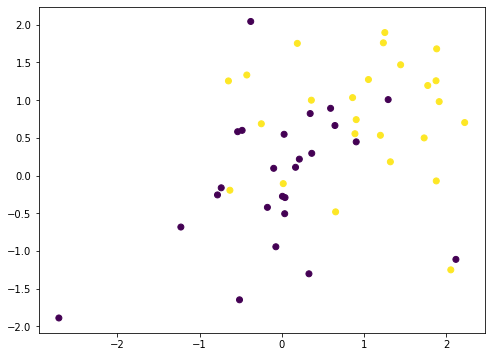

In [3]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1] * 25 + [1] * 25)
X[y==1] += 1
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=y)

In [14]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

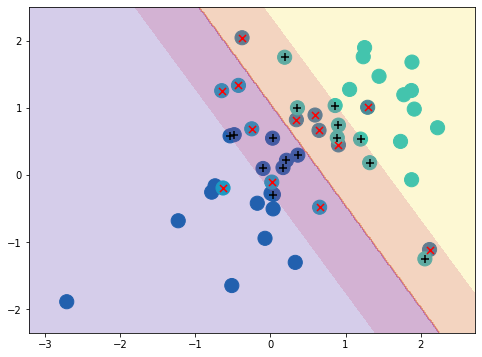

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_svm(X, y, svm_linear, ax=ax)

In [16]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [17]:
grid = GridSearchCV(svm_linear, param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}, refit=True, cv=5, scoring='accuracy')
grid.fit(X, y)
grid.best_estimator_, grid.best_params_

(SVC(C=1, kernel='linear'), {'C': 1})

In [18]:
grid.cv_results_

{'mean_fit_time': array([0.00077024, 0.00080056, 0.00080099, 0.00060039, 0.00080051,
        0.00100069, 0.00380321]),
 'std_fit_time': array([3.89640580e-04, 4.00281418e-04, 4.00495600e-04, 4.90212936e-04,
        4.00257139e-04, 3.50402318e-07, 1.83478602e-03]),
 'mean_score_time': array([0.00060091, 0.00020032, 0.00020022, 0.00040035, 0.00020027,
        0.0004005 , 0.        ]),
 'std_score_time': array([0.00049066, 0.00040064, 0.00040045, 0.00049033, 0.00040054,
        0.0004905 , 0.        ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7]),
 'split1_test_score': array([0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8]),
 'split2_test_score': array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8

In [19]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1] * 10 + [1] * 10)
X_test[y_test==1] += 1

In [20]:
best_ = grid.best_estimator_
y_hat = best_.predict(X_test)
confusion_table(y_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6
